In [ ]:
# Please use Python 3.6.4 or higher to run the code for this book

In [1]:
from platform import python_version

print(python_version())

3.6.4


In [2]:
# code block 1.1
import requests
import json


test_url = 'https://api.pushshift.io/reddit/search/comment/?q=Exxon&subreddit=investing&size=100&after=1566302399&before=1575979199&sort=asc&metadata=True'

r = requests.get(url = test_url)

print("Status Code: ", r.status_code)
print("*"*20)
print(r.headers)

html_response = r.text

Status Code:  200
********************
{'Date': 'Mon, 14 Sep 2020 02:46:29 GMT', 'Content-Type': 'application/json; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d5ef6813c602a438ff0acda5d7bf991a81600051588; expires=Wed, 14-Oct-20 02:46:28 GMT; path=/; domain=.pushshift.io; HttpOnly; SameSite=Lax', 'cache-control': 'public, max-age=1, s-maxage=1', 'Access-Control-Allow-Origin': '*', 'CF-Cache-Status': 'MISS', 'cf-request-id': '052c1ac60c0000e630523bc200000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Vary': 'Accept-Encoding', 'Server': 'cloudflare', 'CF-RAY': '5d26c71cef37e630-LHR', 'Content-Encoding': 'gzip'}


In [3]:
# code block 1.1 (cont.)

with open("raw_pushshift_response.json", "w") as outfile: 
    outfile.write(html_response) 

json_dict = json.loads(html_response)
json_dict.keys()
json_dict["metadata"]

{'after': 1566302399,
 'agg_size': 100,
 'api_version': '3.0',
 'before': 1575979199,
 'es_query': {'query': {'bool': {'filter': {'bool': {'must': [{'terms': {'subreddit': ['investing']}},
       {'range': {'created_utc': {'gt': 1566302399}}},
       {'range': {'created_utc': {'lt': 1575979199}}},
       {'simple_query_string': {'default_operator': 'and',
         'fields': ['body'],
         'query': 'Exxon'}}],
      'should': []}},
    'must_not': []}},
  'size': 100,
  'sort': {'created_utc': 'asc'}},
 'execution_time_milliseconds': 61.19,
 'index': 'rc_delta2',
 'metadata': 'True',
 'q': 'Exxon',
 'ranges': [{'range': {'created_utc': {'gt': 1566302399}}},
  {'range': {'created_utc': {'lt': 1575979199}}}],
 'results_returned': 71,
 'shards': {'failed': 0, 'skipped': 0, 'successful': 4, 'total': 4},
 'size': 100,
 'sort': 'asc',
 'sort_type': 'created_utc',
 'subreddit': ['investing'],
 'timed_out': False,
 'total_results': 71}

In [4]:
# code block 1.1 (cont.)

json_dict["data"][0]

{'all_awardings': [],
 'author': 'InquisitorCOC',
 'author_flair_background_color': None,
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_template_id': None,
 'author_flair_text': None,
 'author_flair_text_color': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_mesjk',
 'author_patreon_flair': False,
 'body': 'Individual stocks:\n\nBoeing and Lockheed: initially languished until 1974, then really took off and gained almost 100x by the end of the decade.\n\nHewlett-Packard: volatile, but generally a consistent winner throughout the decade, gained 15x.\n\nIntel: crashed &gt;70% during the worst of 1974, but bounced back very quickly and went on to be a multi bagger.\n\nOil stocks had done of course very well, Halliburton and Schlumberger were the low risk, low volatility, huge gain stocks of the decade. Exxon on the other hand had performed nowhere as well as these two.\n\nWashington Post: fought Nixon head on in 1973, stocks dropped big. More un

In [5]:
# code block 1.1 (cont.)

date_list = []
comment_list = []
rows_list = []
for i in range(len(json_dict["data"])):
    temp_dict = {}
    temp_dict["id"] = i
    temp_dict["text"] = json_dict["data"][i]['body']
    rows_list.append(temp_dict)
    date_list.append(json_dict["data"][i]['created_utc'])
    comment_list.append(json_dict["data"][i]['body'])
sample_dict = {}
sample_dict["documents"] = rows_list
payload = json.dumps(sample_dict)

with open("sentiments_payload.json", "w") as outfile: 
    outfile.write(payload) 

In [7]:
# code block 1.1 (cont.)

url = 'https://api.algorithmia.com/v1/algo/specrom/GetSentimentsScorefromText/0.2.0?timeout=300'
headers = {
    
    'Authorization': YOUR_ALGORITHMIA_KEY,
    'content-type': "application/json",
    'accept': "application/json"
    }
response = requests.request("POST", url, data=payload, headers=headers)

print("Status Code: ", r.status_code)
print("*"*20)
print(r.headers)

Status Code:  200
********************
{'Date': 'Mon, 14 Sep 2020 02:46:29 GMT', 'Content-Type': 'application/json; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d5ef6813c602a438ff0acda5d7bf991a81600051588; expires=Wed, 14-Oct-20 02:46:28 GMT; path=/; domain=.pushshift.io; HttpOnly; SameSite=Lax', 'cache-control': 'public, max-age=1, s-maxage=1', 'Access-Control-Allow-Origin': '*', 'CF-Cache-Status': 'MISS', 'cf-request-id': '052c1ac60c0000e630523bc200000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Vary': 'Accept-Encoding', 'Server': 'cloudflare', 'CF-RAY': '5d26c71cef37e630-LHR', 'Content-Encoding': 'gzip'}


In [8]:
# code block 1.1 (cont.)

import numpy as np
import pandas as pd

df_sent = pd.DataFrame(json.loads(response.text)["result"]["documents"])
df_sent.head(1)

,id,sentiments_score
0,0,0.523785


In [9]:
# code block 1.1 (cont.)

def get_sentiments(score):
    
    if score > 0.6:
        return 'positive'
    elif score < 0.4:
        return 'negative'
    else:
        return 'neutral'
    
df_sent["sentiments"]=df_sent["sentiments_score"].apply(get_sentiments)
df_sent.head(1)

,id,sentiments_score,sentiments
0,0,0.523785,neutral


Text(0.5,0,'Sentiments')

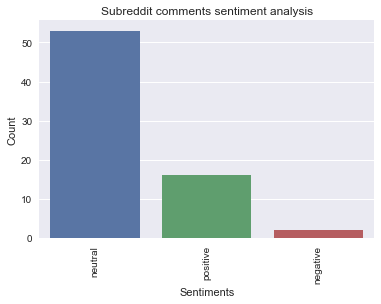

In [10]:
# code block 1.1 (cont.)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

g = sns.countplot(df_sent["sentiments"])
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)
g.set_title('Subreddit comments sentiment analysis')

g.set_ylabel("Count")
g.set_xlabel("Sentiments")

In [13]:
# code block 1.2
# getting data from alphavantage

import requests
import json

test_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=XOM&outputsize=full&apikey=' + API_KEY + '&datatype=csv'


r = requests.get(url = test_url)
print("Status Code: ", r.status_code)
print("*"*20)
print(r.headers)
html_response = r.text
with open("exxon_stock.csv", "w") as outfile: 
    outfile.write(html_response) 

Status Code:  200
********************
{'Connection': 'keep-alive', 'Server': 'gunicorn/19.7.0', 'Date': 'Wed, 29 Apr 2020 04:15:07 GMT', 'Transfer-Encoding': 'chunked', 'Content-Type': 'application/x-download', 'Allow': 'GET, HEAD, OPTIONS', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Disposition': 'attachment; filename=daily_adjusted_XOM.csv', 'Vary': 'Cookie', 'Via': '1.1 vegur'}


In [14]:
# code block 1.2 (Cont.)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from dateutil import parser
datetime_obj = lambda x: parser.parse(x)

df = pd.read_csv("exxon_stock.csv", parse_dates=['timestamp'], date_parser=datetime_obj)
start_date = pd.to_datetime(date_list[0], unit='s')
end_date = pd.to_datetime(date_list[-1], unit='s')
df = df[(df["timestamp"] >= start_date) & (df["timestamp"] <= end_date)]

df.head(1)
# Output

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
95,2019-12-10,69.66,70.15,68.7,69.06,68.0723,14281286,0.0,1.0


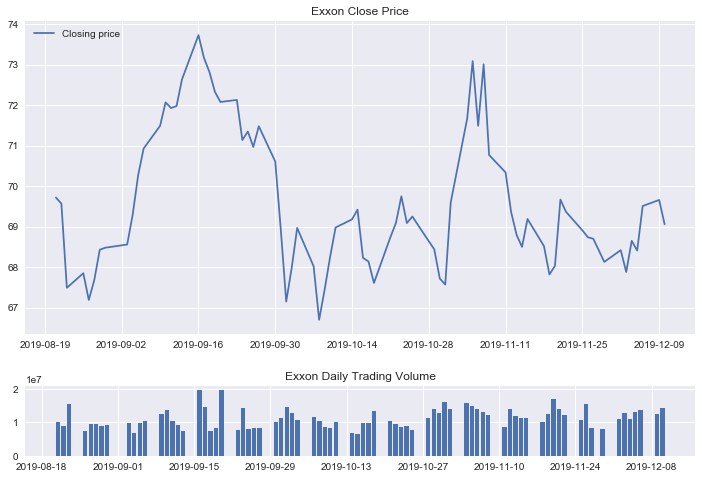

In [15]:
# code block 1.2 (Cont.)

# Plotting stock and volume

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(df['timestamp'], df['close'], label = 'Closing price')
plt.title('Exxon Close Price')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(df["timestamp"], df["volume"])
plt.title('Exxon Daily Trading Volume')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)